In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set()

biomarkers = ['BVP', 'EDA', 'HR', 'TEMP']
emotions = ['upset', 'hostile', 'alert', 'ashamed',
       'inspired', 'nervous', 'determined', 'attentive', 'afraid', 'active',
       'frustrated', 'difficulty']
others = ['puzzler', 'team_ID', 'participant_ID']

In [2]:
df_1 = pd.read_csv(f'../data/D1_1/ID_1/round_2/phase3/TEMP.csv')
df_2 = pd.read_csv(f'../data/D1_1/ID_1/round_2/phase3/HR.csv')
df_3 = pd.read_csv(f'../data/D1_1/ID_1/round_2/phase3/EDA.csv')
df_4 = pd.read_csv(f'../data/D1_1/ID_1/round_2/phase3/BVP.csv')

df = pd.DataFrame()
df = pd.read_csv(f'../data/D1_1/ID_1/round_2/phase3/TEMP.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.mean(axis=0)
# Take the mean of the 4 biomarkers and join them in a dataframe
for biomarker in ['HR', 'EDA', 'BVP']:
    df_biomarker = pd.read_csv(f'../data/D1_1/ID_1/round_2/phase3/{biomarker}.csv')
    df_biomarker = df_biomarker.drop(columns=['Unnamed: 0'])
    print(df_biomarker.mean(axis=0))
    df[biomarker] = df_biomarker.mean(axis=0)[biomarker]

df

/var/folders/ws/k1b01gtx6w3cxl_xhlxl_6vm0000gn/T/ipykernel_57438/2347001321.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.mean(axis=0)
/var/folders/ws/k1b01gtx6w3cxl_xhlxl_6vm0000gn/T/ipykernel_57438/2347001321.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_biomarker.mean(axis=0))
/var/folders/ws/k1b01gtx6w3cxl_xhlxl_6vm0000gn/T/ipykernel_57438/2347001321.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, 

HR    83.587642
dtype: float64
EDA    0.294519
dtype: float64
BVP    0.084515
dtype: float64


/var/folders/ws/k1b01gtx6w3cxl_xhlxl_6vm0000gn/T/ipykernel_57438/2347001321.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[biomarker] = df_biomarker.mean(axis=0)[biomarker]


TEMP    34.312552
HR      83.587642
EDA      0.294519
BVP      0.084515
dtype: float64

In [3]:
# Load data
num_participants = 6
num_rounds = 4
num_phases = 3

df_bm = pd.DataFrame() # Biomarkers data
df_qs = pd.DataFrame() # Questionnaire data

# Ignore futurewarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Get all HR data and response of all participants
for i in range(num_participants): 
    for j in range(num_rounds):
        for k in range(num_phases):
            # Get all questionnaire data
            df = pd.read_csv(f'../data/D1_2/ID_{i+1}/round_{j+1}/phase{k+1}/response.csv')
            df['round'] = j
            df['phase'] = k
            participant_id = df['participant_ID'].values[0]
            df_qs = pd.concat([df_qs, df], ignore_index=True)


            # Take the mean of the 4 biomarkers and join them in a dataframe
            df = pd.DataFrame()
            df = pd.read_csv(f'../data/D1_2/ID_{i+1}/round_{j+1}/phase{k+1}/TEMP.csv')
            df = df.drop(columns=['Unnamed: 0'])
            df = df.mean(axis=0)
            df['round'] = j
            df['participant_id'] = participant_id
            df['phase'] = k

            for biomarker in ['HR', 'EDA', 'BVP']:
                df_biomarker = pd.read_csv(f'../data/D1_2/ID_{i+1}/round_{j+1}/phase{k+1}/{biomarker}.csv')
                df_biomarker = df_biomarker.drop(columns=['Unnamed: 0'])
                #print(df_biomarker.mean(axis=0))
                df[biomarker] = df_biomarker.mean(axis=0)[biomarker]

            df = df.to_frame().T
            df_bm = pd.concat([df_bm, df], ignore_index=True)

df_qs.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# Prep to join the two dataframes of biomarkers and emotions for cohort 2
df_bm['participant_id'] = df_bm['participant_id'].astype(int)
df_bm['round'] = df_bm['round'].astype(int)
df_bm['phase'] = df_bm['phase'].astype(int)

# Create new column in df_bm with the participant_id and round and phase
df_bm['key'] = df_bm['participant_id'].astype(str) + '_' + df_bm['round'].astype(str) + '_' + df_bm['phase'].astype(str)

#df_joined = pd.merge(df_bm, df_qs, left_on='participant_id', right_on='participant_ID')
df_bm.set_index('key', inplace=True)

# Do the same for bm_qs
df_qs['key'] = df_qs['participant_ID'].astype(str) + '_' + df_qs['round'].astype(str) + '_' + df_qs['phase'].astype(str)
df_qs.set_index('key', inplace=True)

In [5]:
# Join the two dataframes
df_joined = pd.merge(df_bm, df_qs, left_index=True, right_index=True)
df_joined = df_joined.drop(columns=['participant_id', 'round_y', 'phase_y', 'E4_nr'])
df_joined.rename(columns={'round_x': 'round', 'phase_x': 'phase'}, inplace=True)
df_joined

TEMP  round  phase         HR        EDA       BVP  \
key                                                              
2_0_0  34.725198      0      0  75.831419   8.593471  0.087859   
2_0_1  34.797778      0      1  75.644402   9.179004  0.161455   
2_0_2  34.873177      0      2  74.228161   9.481030  0.008864   
2_1_0  34.879512      1      0  72.713064   7.936545 -0.025065   
2_1_1  35.140917      1      1  75.852706   8.196103  0.002634   
...          ...    ...    ...        ...        ...       ...   
3_2_1  35.007357      2      1  90.341093   1.976447  0.026911   
3_2_2  34.852050      2      2  75.596777   1.796107 -0.132016   
3_3_0  35.202295      3      0  76.416821  16.661606  0.090880   
3_3_1  35.352780      3      1  83.606447  19.134122  0.122086   
3_3_2  35.093987      3      2  74.589444  18.725489  0.130762   

       participant_ID  puzzler  team_ID  upset  ...  alert  ashamed  inspired  \
key                                             ...                             
2_0_0               2        0        1      1  ...      2        1         2   
2_0_1               2        0        1      1  ...      4        1         3   
2_0_2               2        0        1      1  ...      3        1         3   
2_1_0               2        0        1      1  ...      2        1         2   
2_1_1               2        0        1      2  ...      2        1         2   
...               ...      ...      ...    ...  ...    ...      ...       ...   
3_2_1               3        1        2      2  ...      3        1         4   
3_2_2               3        1        2      1  ...      1        1         1   
3_3_0               3        1        2      1  ...      2        1         4   
3_3_1               3        1        2      4  ...      3        2         1   
3_3_2               3        1        2      2  ...      1        1         3   

       nervous  determined  attentive  afraid  active  frustrated  difficulty  
key                                                                            
2_0_0        1           2          3       1       3           0         NaN  
2_0_1        1           4          3       1       4           1         4.0  
2_0_2        1           1          3       1       2           0         NaN  
2_1_0        1           3          2       1       2           1         NaN  
2_1_1        1           3          3       1       1           2         6.0  
...        ...         ...        ...     ...     ...         ...         ...  
3_2_1        2           4          4       1       4           5         5.0  
3_2_2        2           2          1       1       1           2         NaN  
3_3_0        2           5          3       1       2           2         NaN  
3_3_1        2           3          4       1       5           8         9.0  
3_3_2        2           4          1       1       2           4         NaN  

[72 rows x 21 columns]

In [10]:
df['BVP'].std()

nan

<h3>Overview of the data</h3>


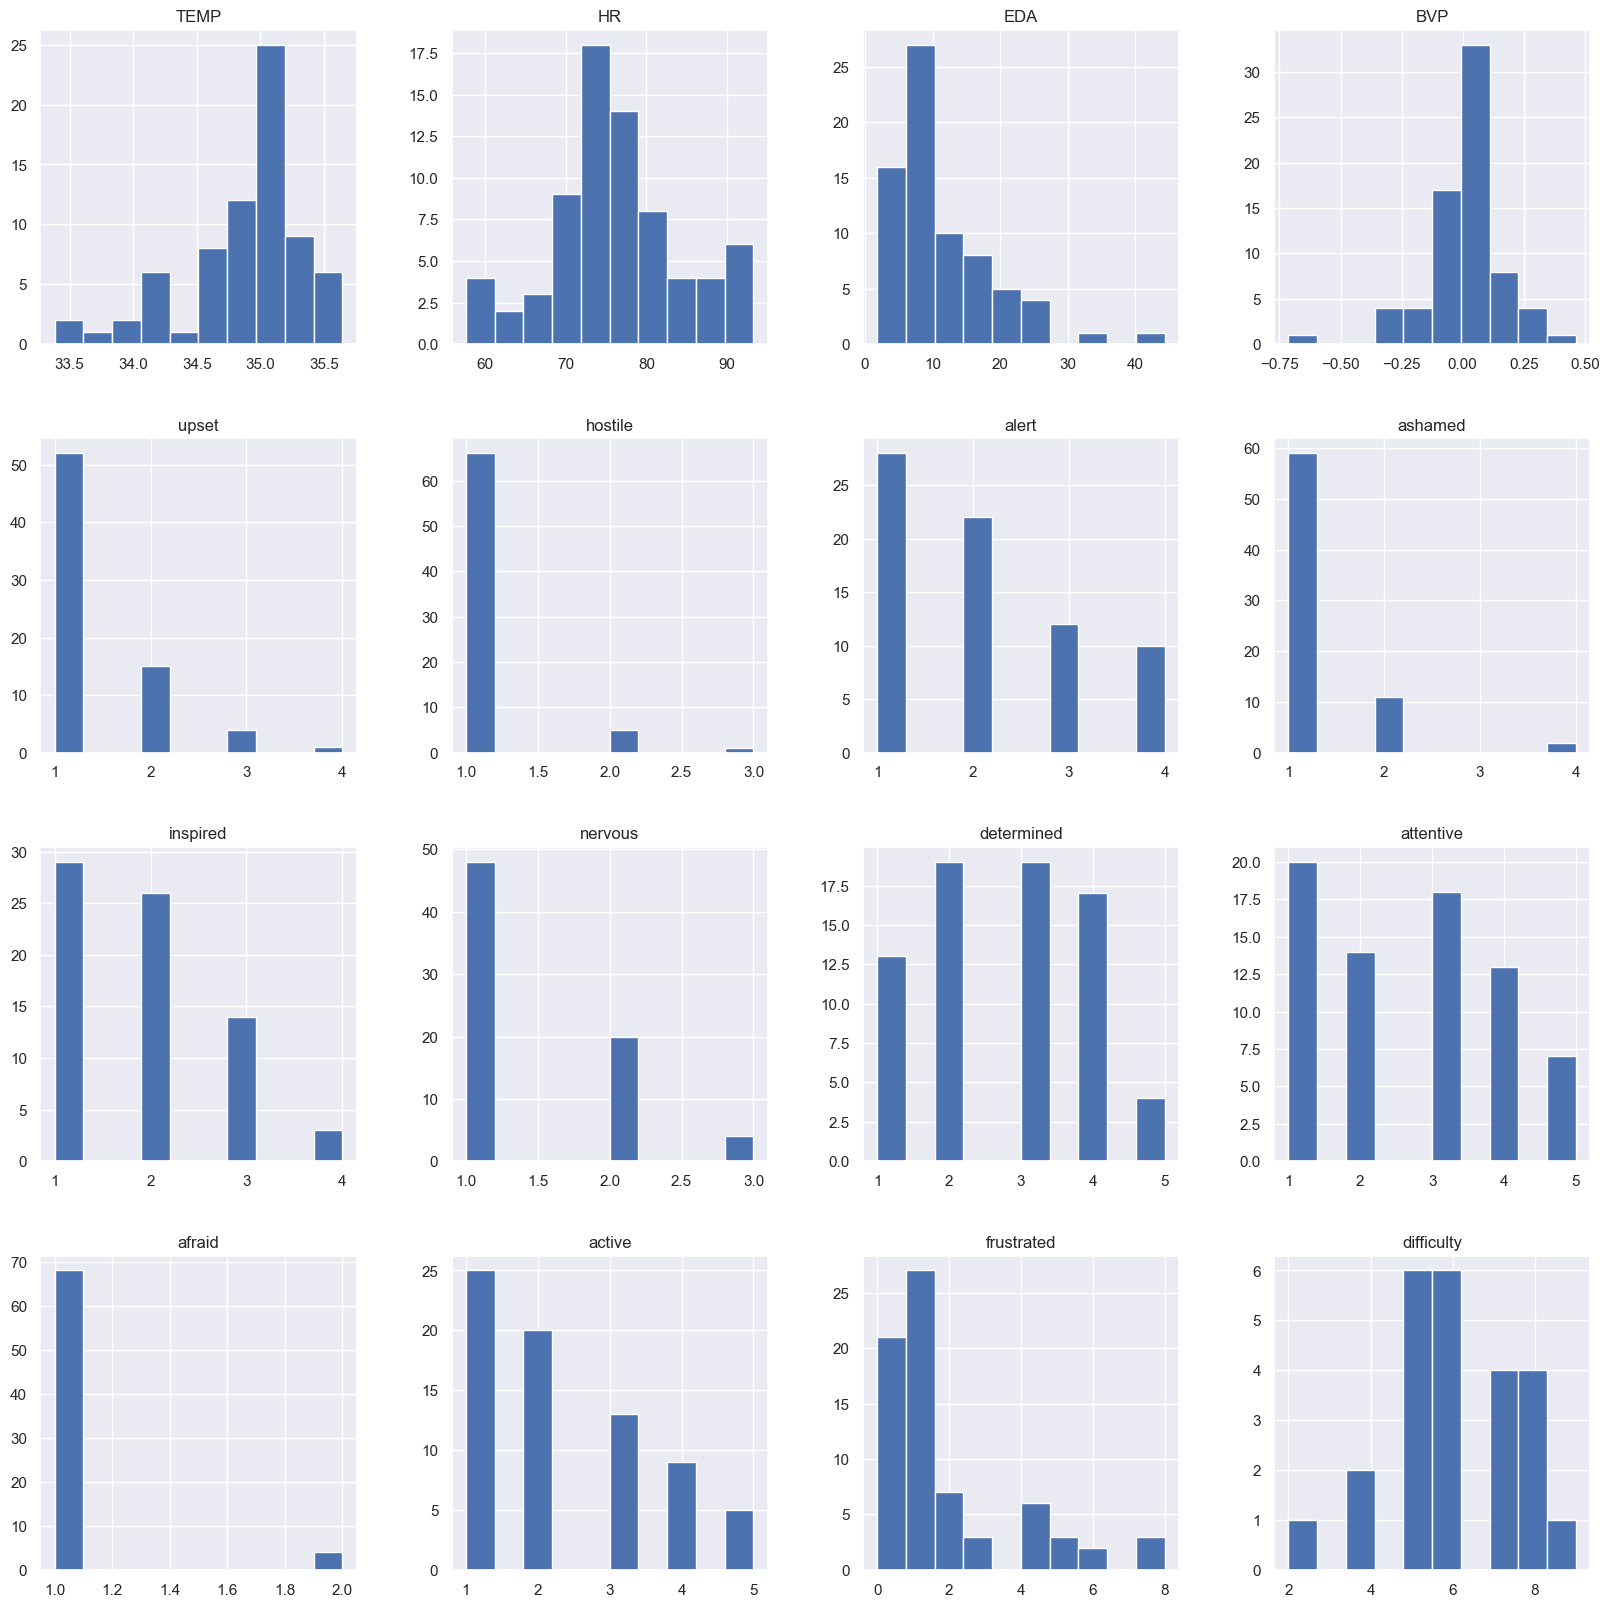

In [219]:
# Plot barchart of the columns of the joined dataframe
df_joined.drop(columns=['participant_ID', 'puzzler', 'team_ID', 'round', 'phase']).hist(figsize=(20, 20))
plt.show()

<h3> What external factors influence biomarkers and emotions </h3>

In [254]:
df_joined_agg_phase

phase       TEMP  round         HR        EDA       BVP  participant_ID  \
0      0  34.744221    1.5  74.222034  10.619826  0.014497             3.5   
1      1  34.961694    1.5  80.524777  10.459349 -0.001478             3.5   
2      2  34.940511    1.5  73.363784  12.872449  0.020579             3.5   

   puzzler  team_ID     upset  ...     alert   ashamed  inspired   nervous  \
0      0.5      2.0  1.041667  ...  1.583333  1.208333  1.791667  1.416667   
1      0.5      2.0  1.958333  ...  3.041667  1.416667  2.000000  1.541667   
2      0.5      2.0  1.083333  ...  1.541667  1.083333  1.833333  1.208333   

   determined  attentive    afraid    active  frustrated  difficulty  
0    2.458333   2.166667  1.000000  1.666667    0.500000         NaN  
1    3.625000   3.833333  1.166667  3.583333    3.625000    6.041667  
2    2.083333   1.875000  1.000000  1.625000    1.083333         NaN  

[3 rows x 21 columns]

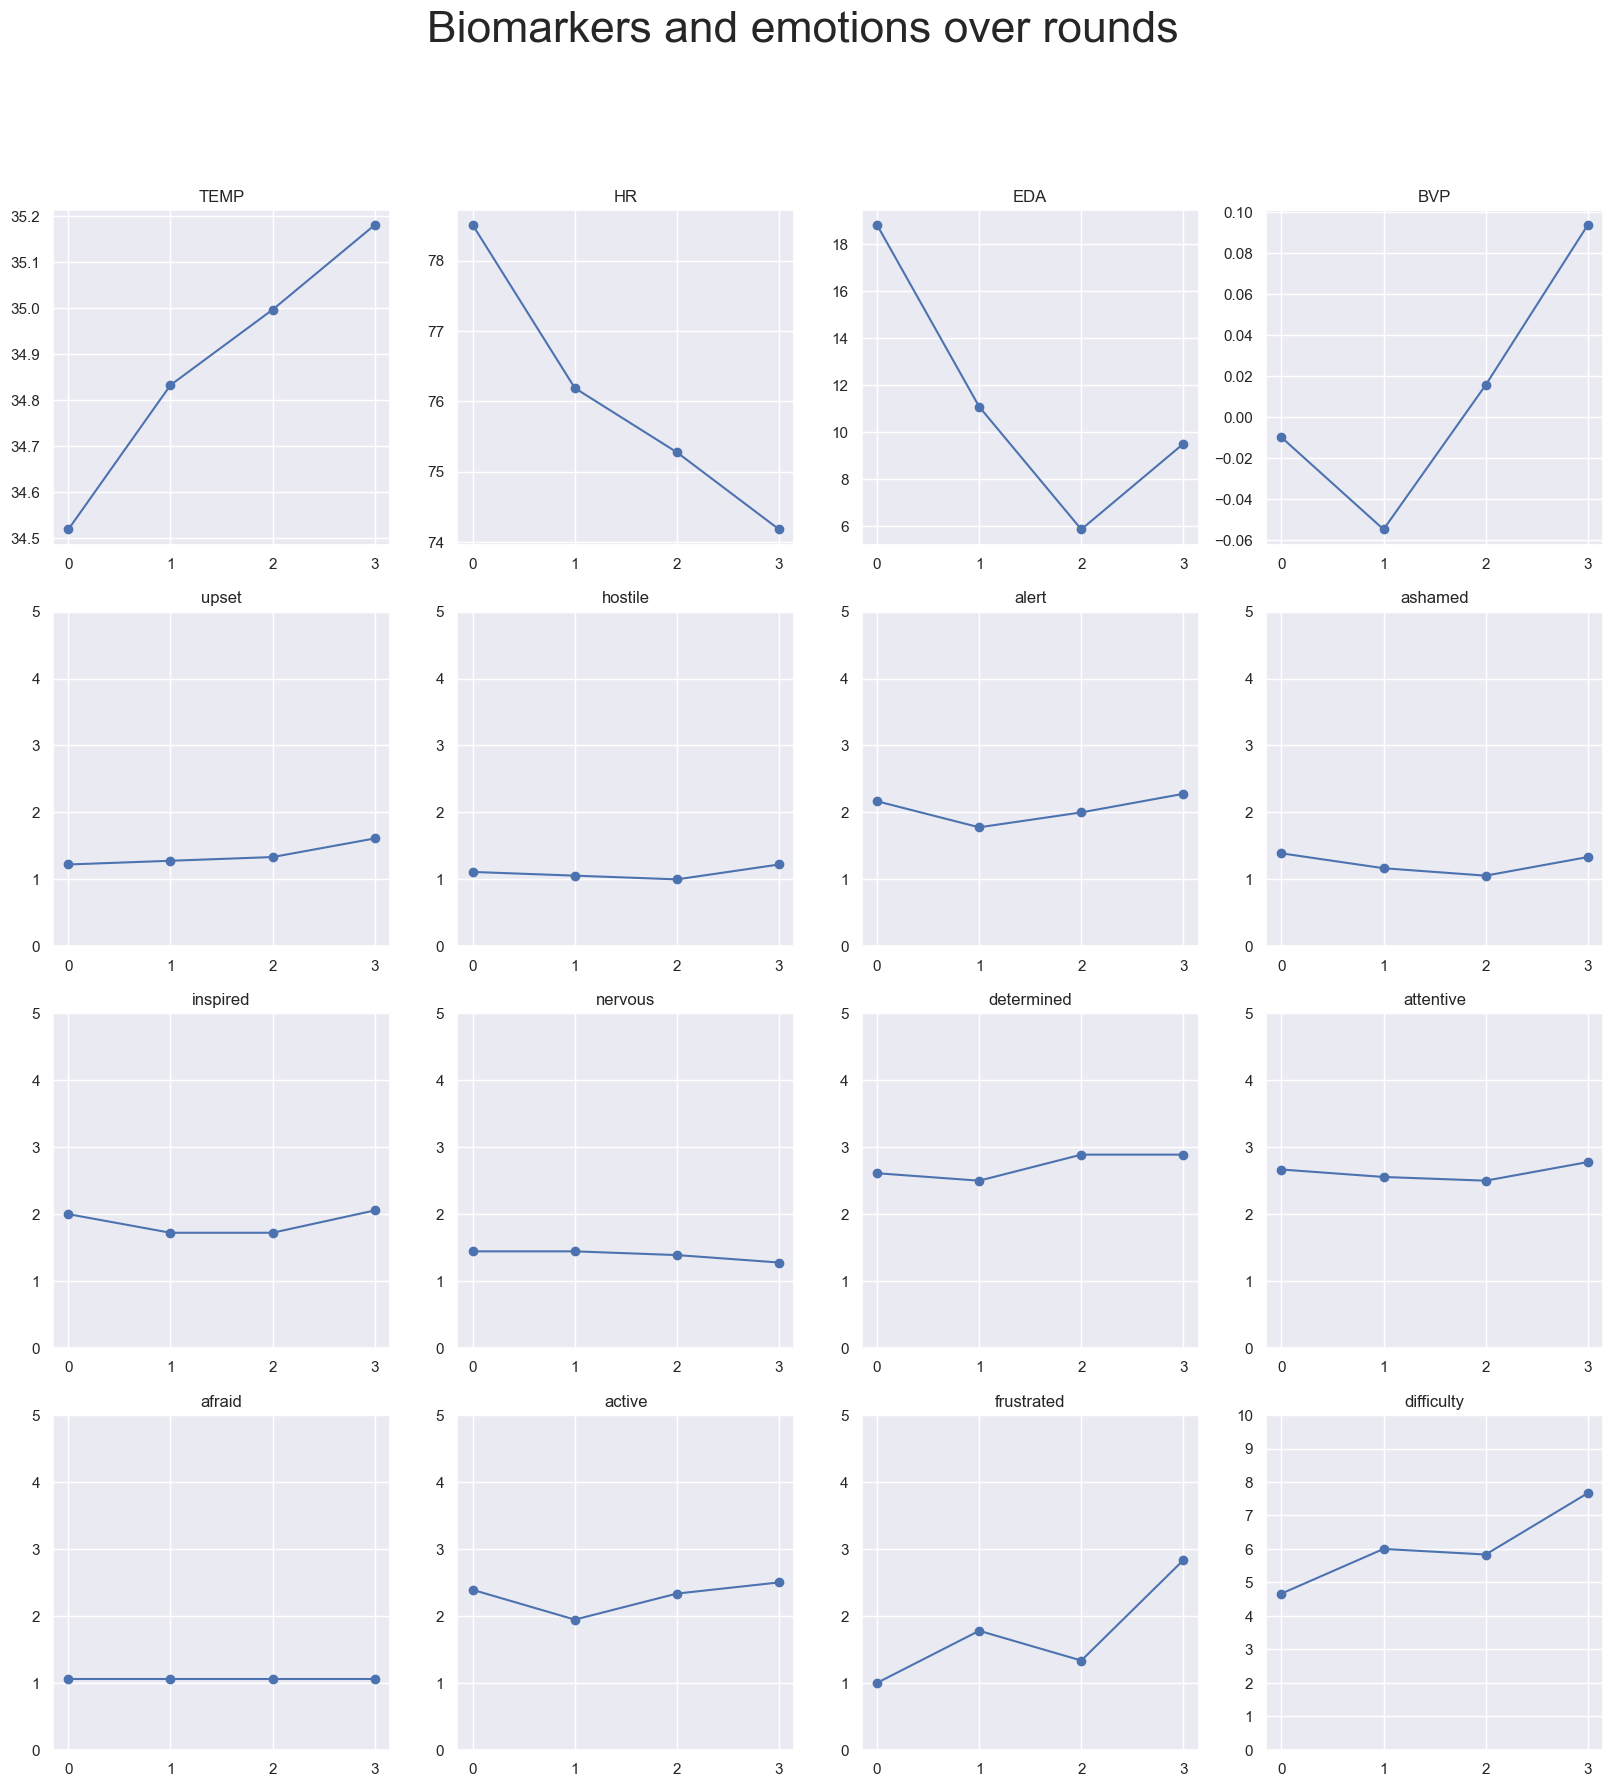

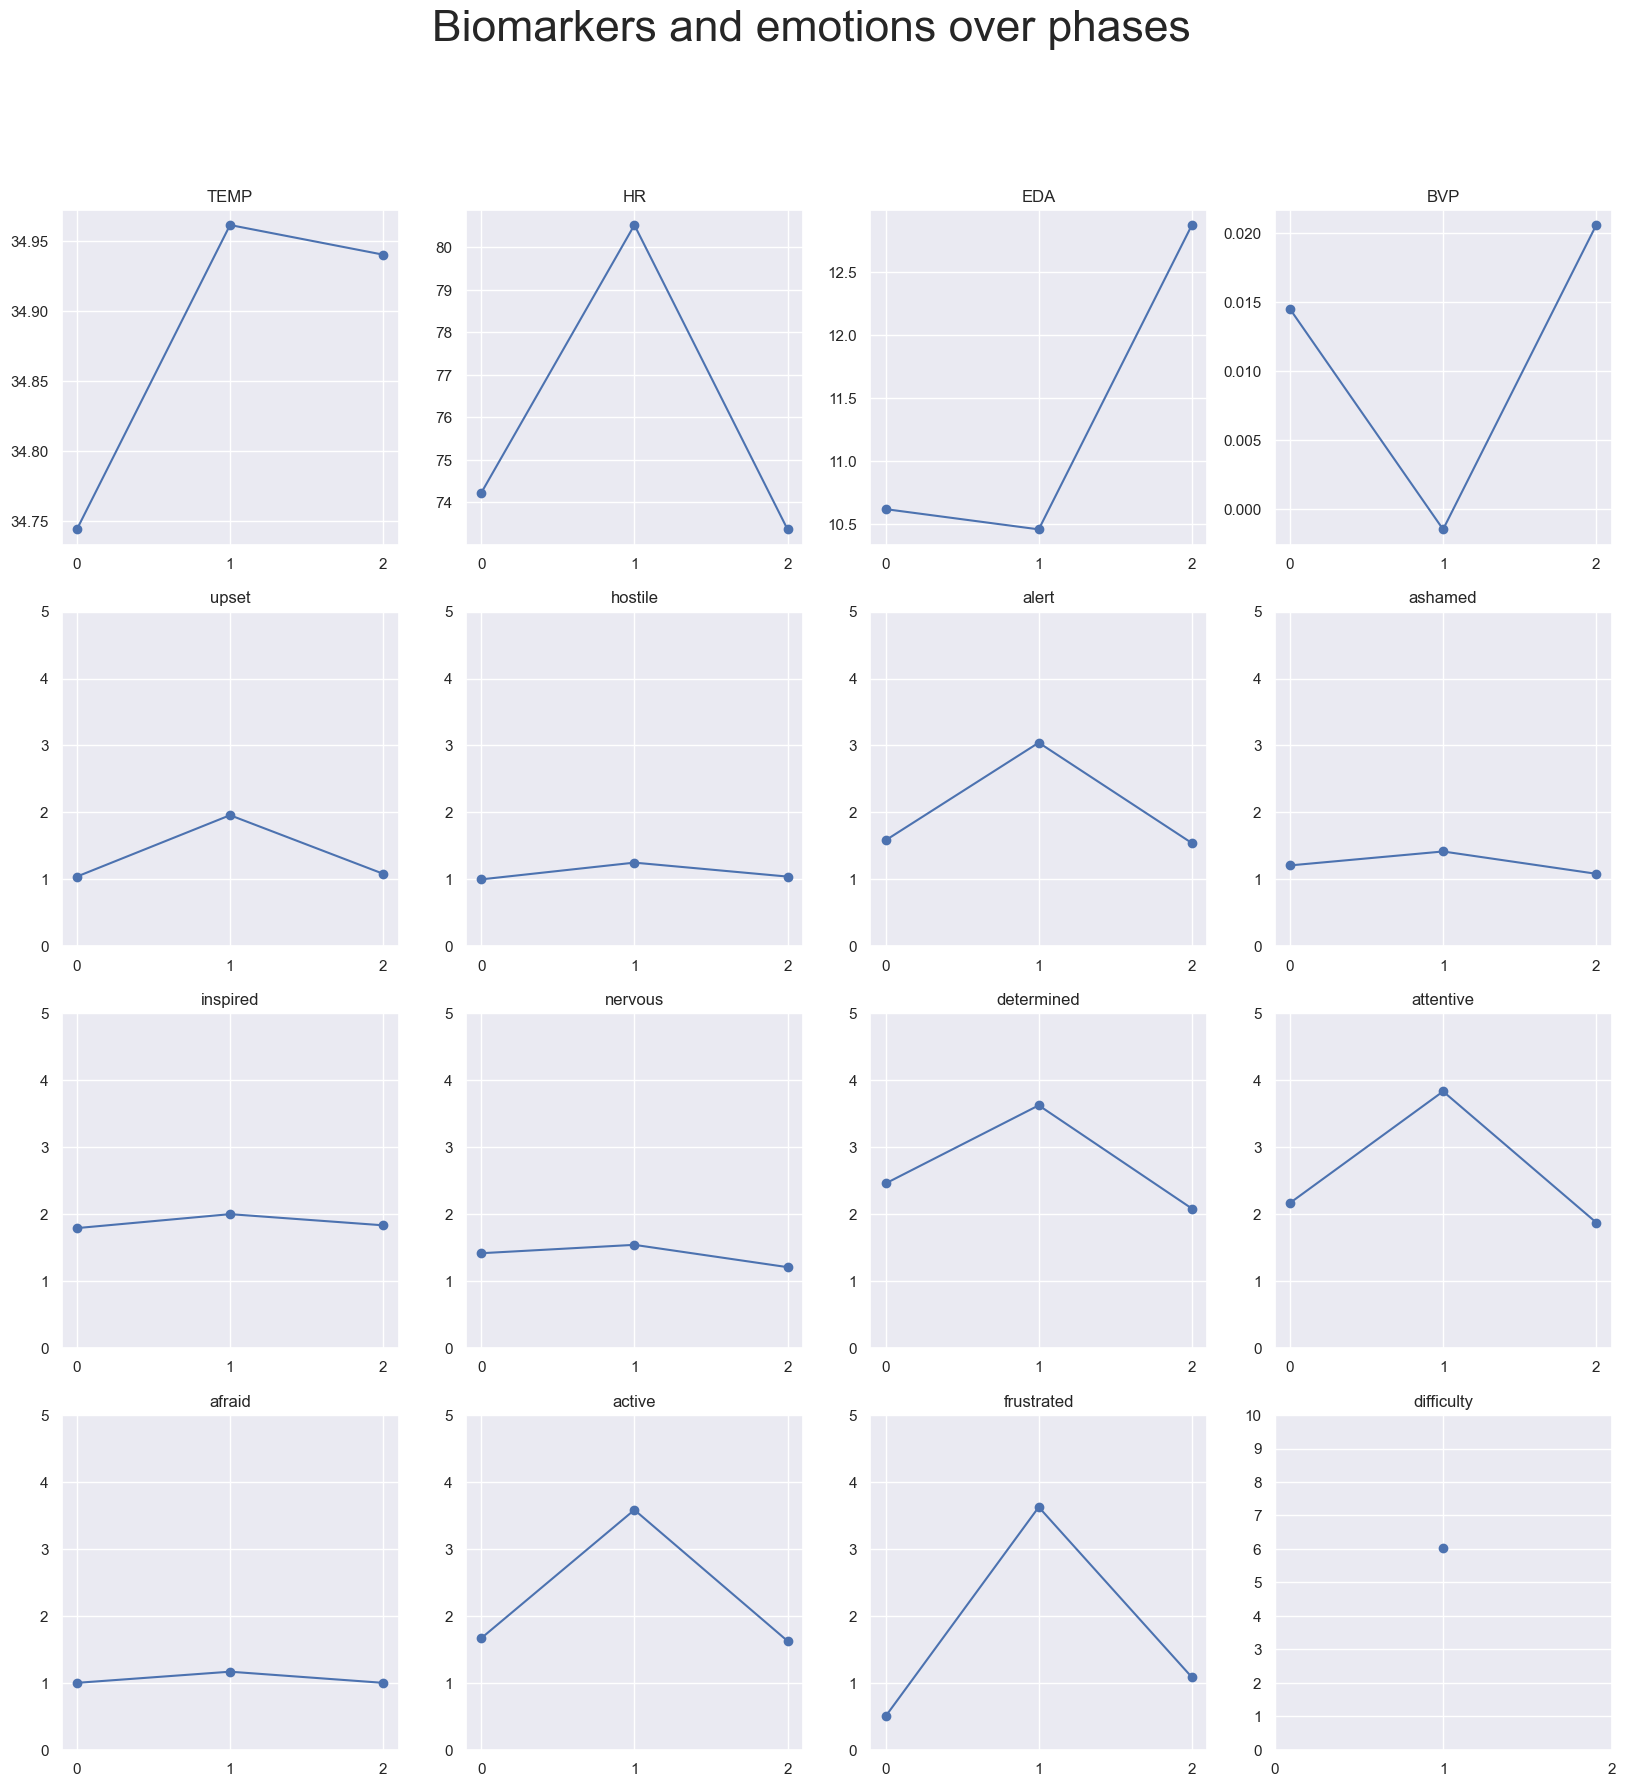

"\n# Plot how the biomarkers and emotions change over rounds\nfig, ax = plt.subplots(1, 2, figsize=(20, 10))\n\nfor i, col in enumerate(biomarkers):\n    ax[0].plot(df_joined_agg_round['round'], df_joined_agg_round[col], 'o-', label=col)\n\nfor i, col in enumerate(emotions):\n    ax[1].plot(df_joined_agg_round['round'], df_joined_agg_round[col], 'o-', label=col)\n\nplt.legend()\nplt.show()\n"

In [253]:
# Aggregate data over rounds and plot biomarkers and emotions over rounds
df_joined_agg_round = df_joined.groupby(['round']).mean().reset_index()
df_joined_agg_phase = df_joined.groupby(['phase']).mean().reset_index()

# Standradize the data
# df_joined_agg_round = (df_joined_agg_round - df_joined_agg_round.mean()) / df_joined_agg_round.std()
# df_joined_agg_phase = (df_joined_agg_phase - df_joined_agg_phase.mean()) / df_joined_agg_phase.std()


# plot each column against rounds
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i, col in enumerate(df_joined_agg_round.drop(['participant_ID', 'puzzler', 'round', 'phase', 'team_ID'], axis=1).columns):
    ax[i//4, i%4].plot(df_joined_agg_round['round'], df_joined_agg_round[col], 'o-', label=col)
    ax[i//4, i%4].set_xticks(df_joined_agg_round['round'])
    if col in emotions:
        ax[i//4, i%4].set_yticks(np.arange(0, 6, 1))    
        if col == 'difficulty':
            ax[i//4, i%4].set_yticks(np.arange(0, 11, 1))

    ax[i//4, i%4].set_title(col)

# Create big title
fig.suptitle('Biomarkers and emotions over rounds', fontsize=32)
plt.show()


# Do the same for phases
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i, col in enumerate(df_joined_agg_phase.drop(['participant_ID', 'puzzler', 'round', 'phase', 'team_ID'], axis=1).columns):
    ax[i//4, i%4].plot(df_joined_agg_phase['phase'], df_joined_agg_phase[col], 'o-', label=col)
    ax[i//4, i%4].set_xticks(df_joined_agg_phase['phase'])
    if col in emotions:
        ax[i//4, i%4].set_yticks(np.arange(0, 6, 1))    
        if col == 'difficulty':
            ax[i//4, i%4].set_yticks(np.arange(0, 11, 1))

    ax[i//4, i%4].set_title(col)

# Create big title
fig.suptitle('Biomarkers and emotions over phases', fontsize=32)
plt.show()


"""
# Plot how the biomarkers and emotions change over rounds
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

for i, col in enumerate(biomarkers):
    ax[0].plot(df_joined_agg_round['round'], df_joined_agg_round[col], 'o-', label=col)

for i, col in enumerate(emotions):
    ax[1].plot(df_joined_agg_round['round'], df_joined_agg_round[col], 'o-', label=col)

plt.legend()
plt.show()
"""

<h4>Aggregation over rounds</h4>Interestingly the frustration and difficulty is increasing with the rounds. So it is actually getting harder the more used they are to the experiment. The other emotions are quite static. Temp is increasing with number of rounds - probably because they are indoor and heartrate is decreasing with number of rounds. perhaps beause they are getting used to the experiment. 

<h4>Aggregation over phases</h4>
Unsuprisngly the biomarkers are influenced by what phase the participant is in. Same goes for some emotions including frustration and active attentive determined and alert. The emotions return basically to baseline after the phase 3 is over, suggesting that relaxing after high brain activity is necessary to get back to baseline. 

<h3> What is the interaction between biomarkers and emotions </h3>

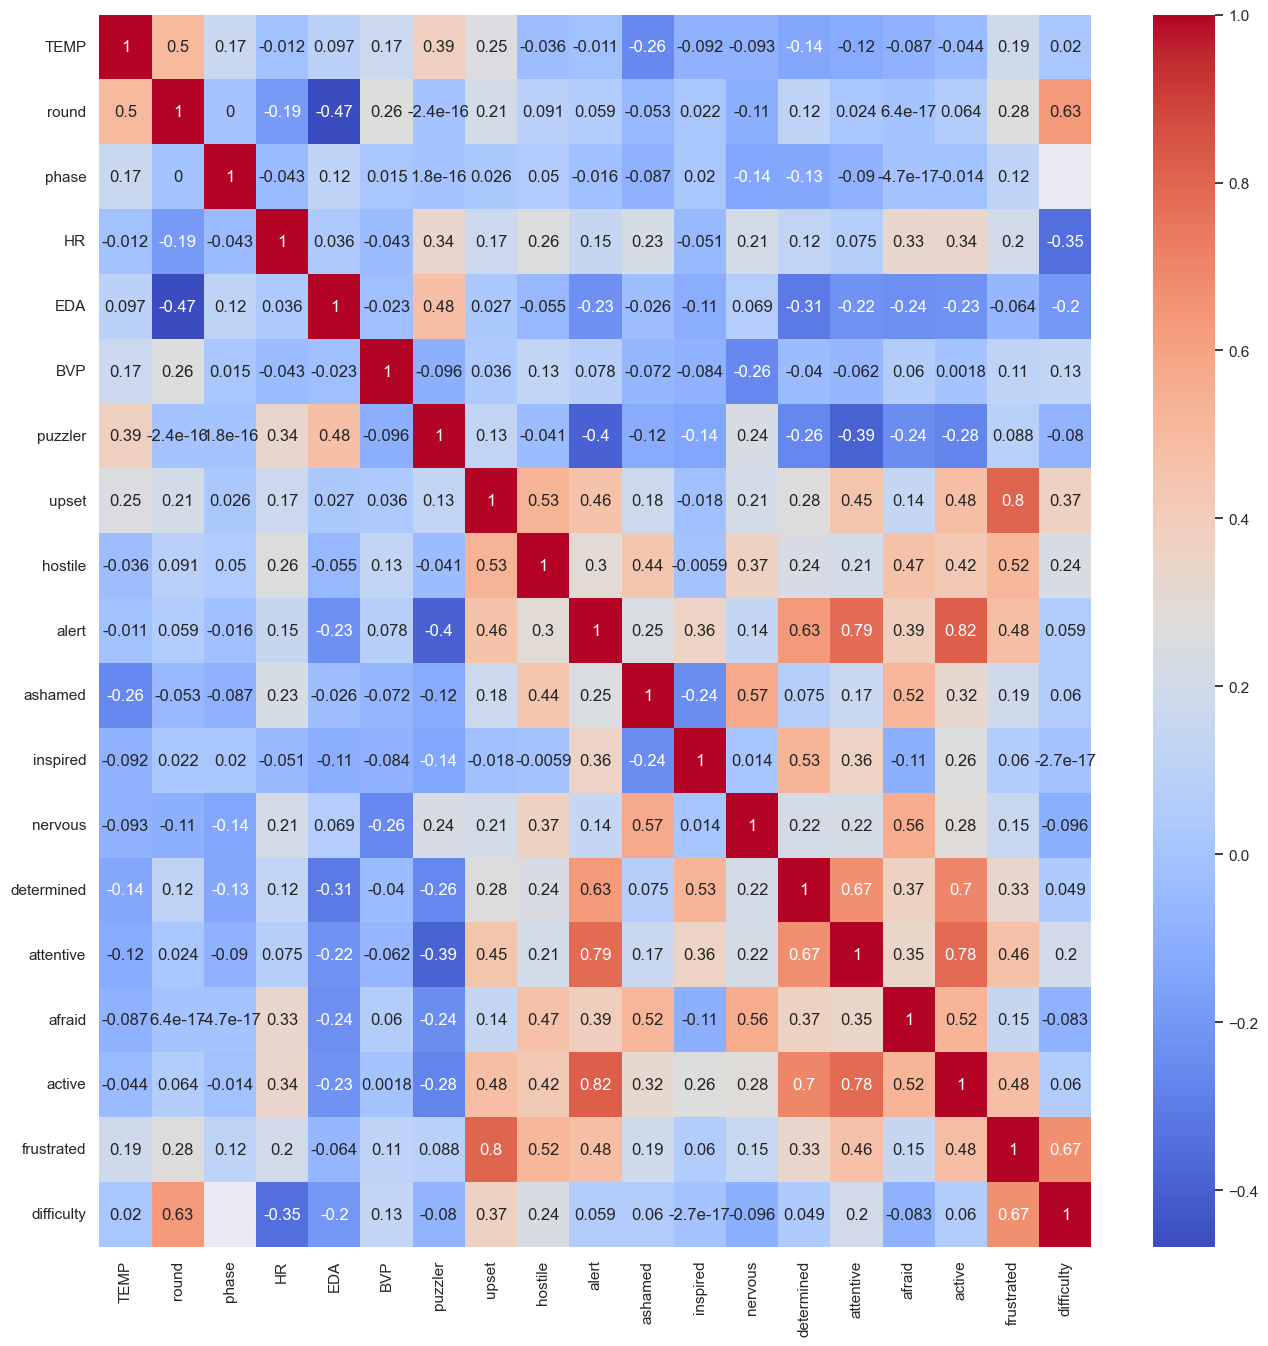

In [193]:
# Idea 1: Make a correlation matrix of the biomarkers and emotions and see if there is a correlation
corr = df_joined.drop('team_ID', axis=1).corr()

# Plot correlation matrix
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [201]:
# Highets correlation score for each emotion and biomarker
test_corrs = corr[biomarkers].T

test_corrs[test_corrs > .5]

TEMP     round  phase   HR  EDA  BVP  puzzler  upset  hostile  alert  \
BVP    NaN       NaN    NaN  NaN  NaN  1.0      NaN    NaN      NaN    NaN   
EDA    NaN       NaN    NaN  NaN  1.0  NaN      NaN    NaN      NaN    NaN   
HR     NaN       NaN    NaN  1.0  NaN  NaN      NaN    NaN      NaN    NaN   
TEMP   1.0  0.500866    NaN  NaN  NaN  NaN      NaN    NaN      NaN    NaN   

      ashamed  inspired  nervous  determined  attentive  afraid  active  \
BVP       NaN       NaN      NaN         NaN        NaN     NaN     NaN   
EDA       NaN       NaN      NaN         NaN        NaN     NaN     NaN   
HR        NaN       NaN      NaN         NaN        NaN     NaN     NaN   
TEMP      NaN       NaN      NaN         NaN        NaN     NaN     NaN   

      frustrated  difficulty  
BVP          NaN         NaN  
EDA          NaN         NaN  
HR           NaN         NaN  
TEMP         NaN         NaN

<h4>Preliminary Conclusion</h3>
Preliminary conclusion. There is really no correlation between the biomarkers and the emotions

<h3> Conduct a PCA </h3>

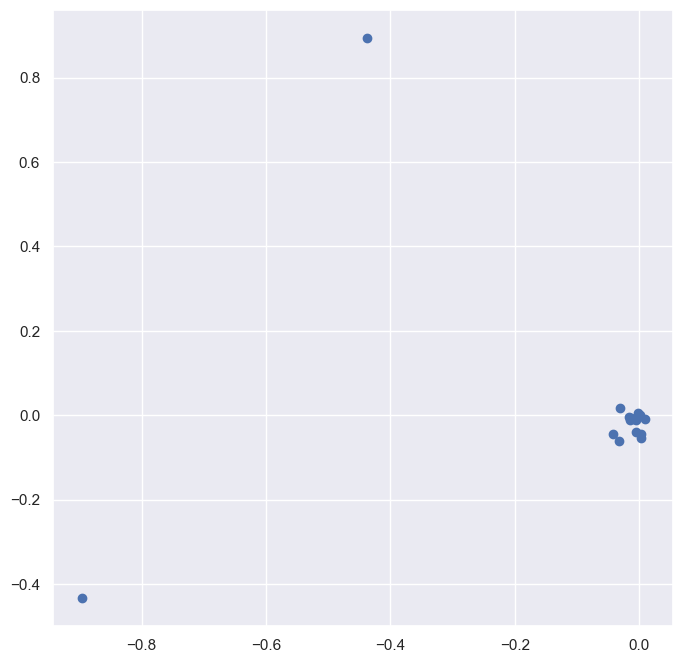

In [211]:
# Do PCA on dataframe to see if we can find a pattern
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit_transform(df_joined.drop(columns=['team_ID', 'round', 'phase', 'difficulty']))

# Plot the PCA
plt.figure(figsize=(8,8))
plt.scatter(pca.components_[0], pca.components_[1])
plt.show()

<h3> Investigate scores. Can biomarkers and emotions be used to predict scores? </h3>

In [271]:
# Load scores
scores = pd.read_csv('../data/D1_2/scores_D1_2.csv')

d = {'Team' : [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], 'Round' : [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3], 'Score' : [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]}

scores = pd.DataFrame(data=d)
scores

Team  Round  Score
0      1      0      1
1      1      1      0
2      1      2      1
3      1      3      0
4      2      0      1
5      2      1      0
6      2      2      1
7      2      3      0
8      3      0      0
9      3      1      0
10     3      2      0
11     3      3      0

In [283]:
df_joined_agg_team = df_joined.groupby(['participant_ID', 'team_ID', 'round']).mean().reset_index()

df_joined_agg_team_scores = pd.merge(df_joined_agg_team, scores, left_on='team_ID', right_on='Team')
df_joined_agg_team_scores.drop(columns=['team_ID', 'phase'], inplace=True)

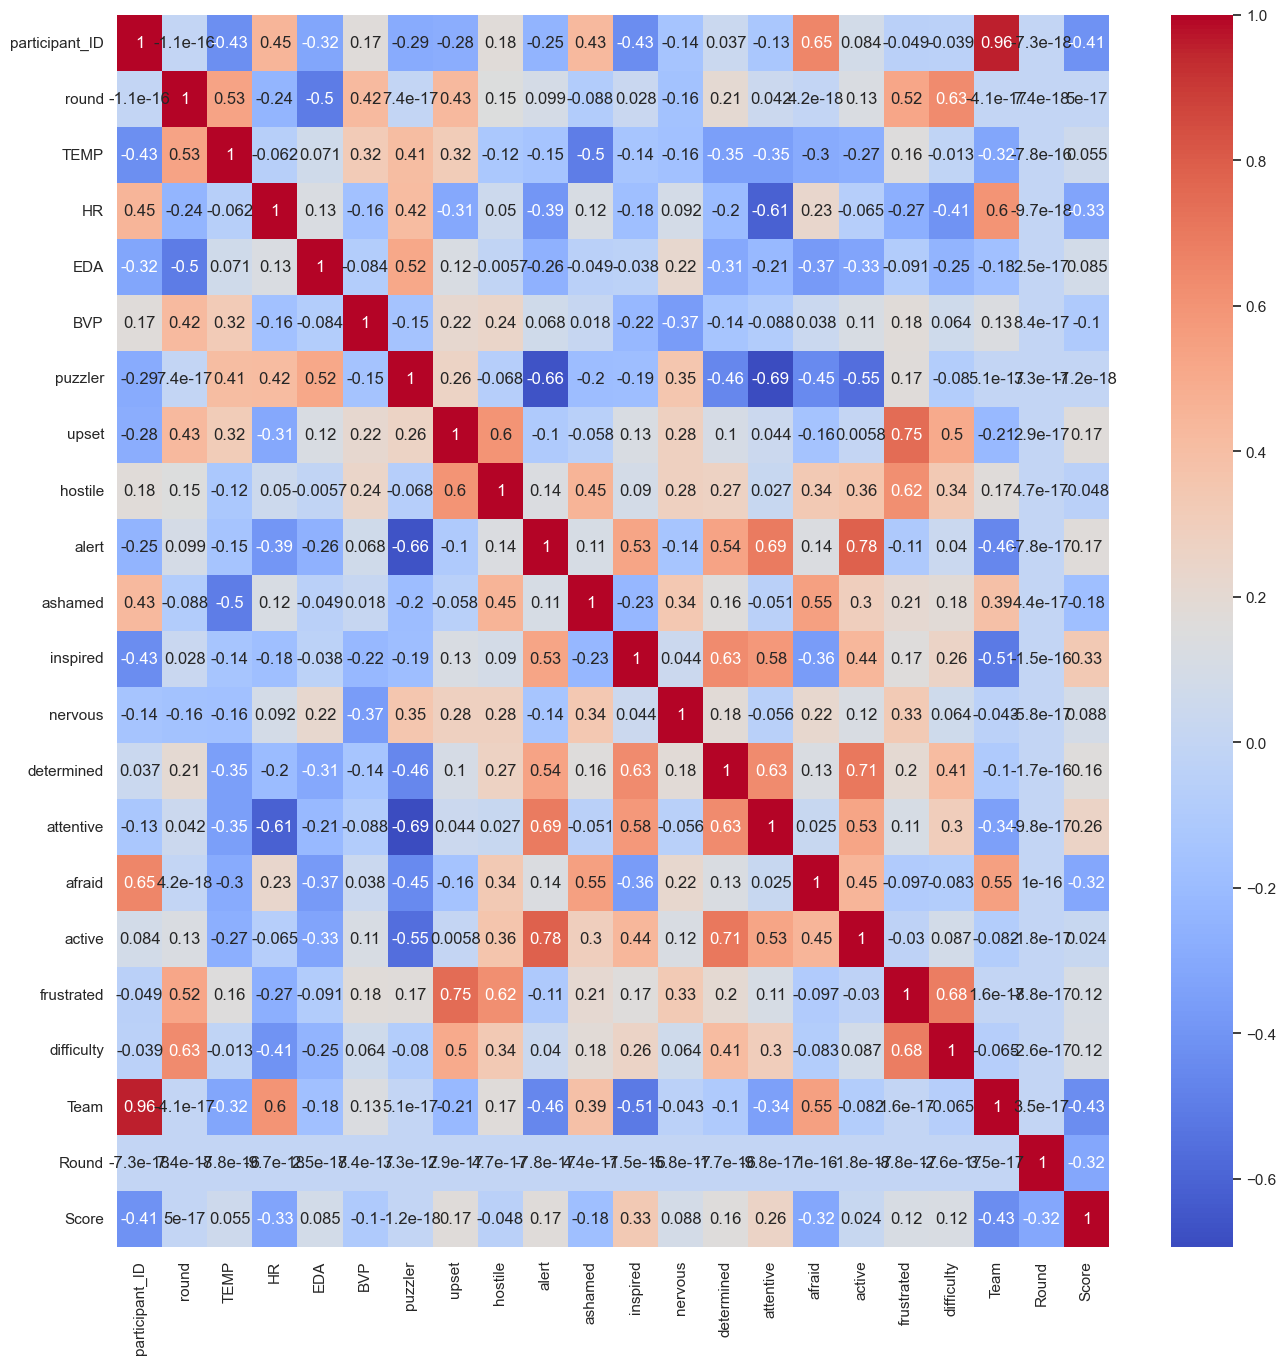

In [284]:
df_joined_agg_team_scores

corr = df_joined_agg_team_scores.corr()

# Plot correlation matrix
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

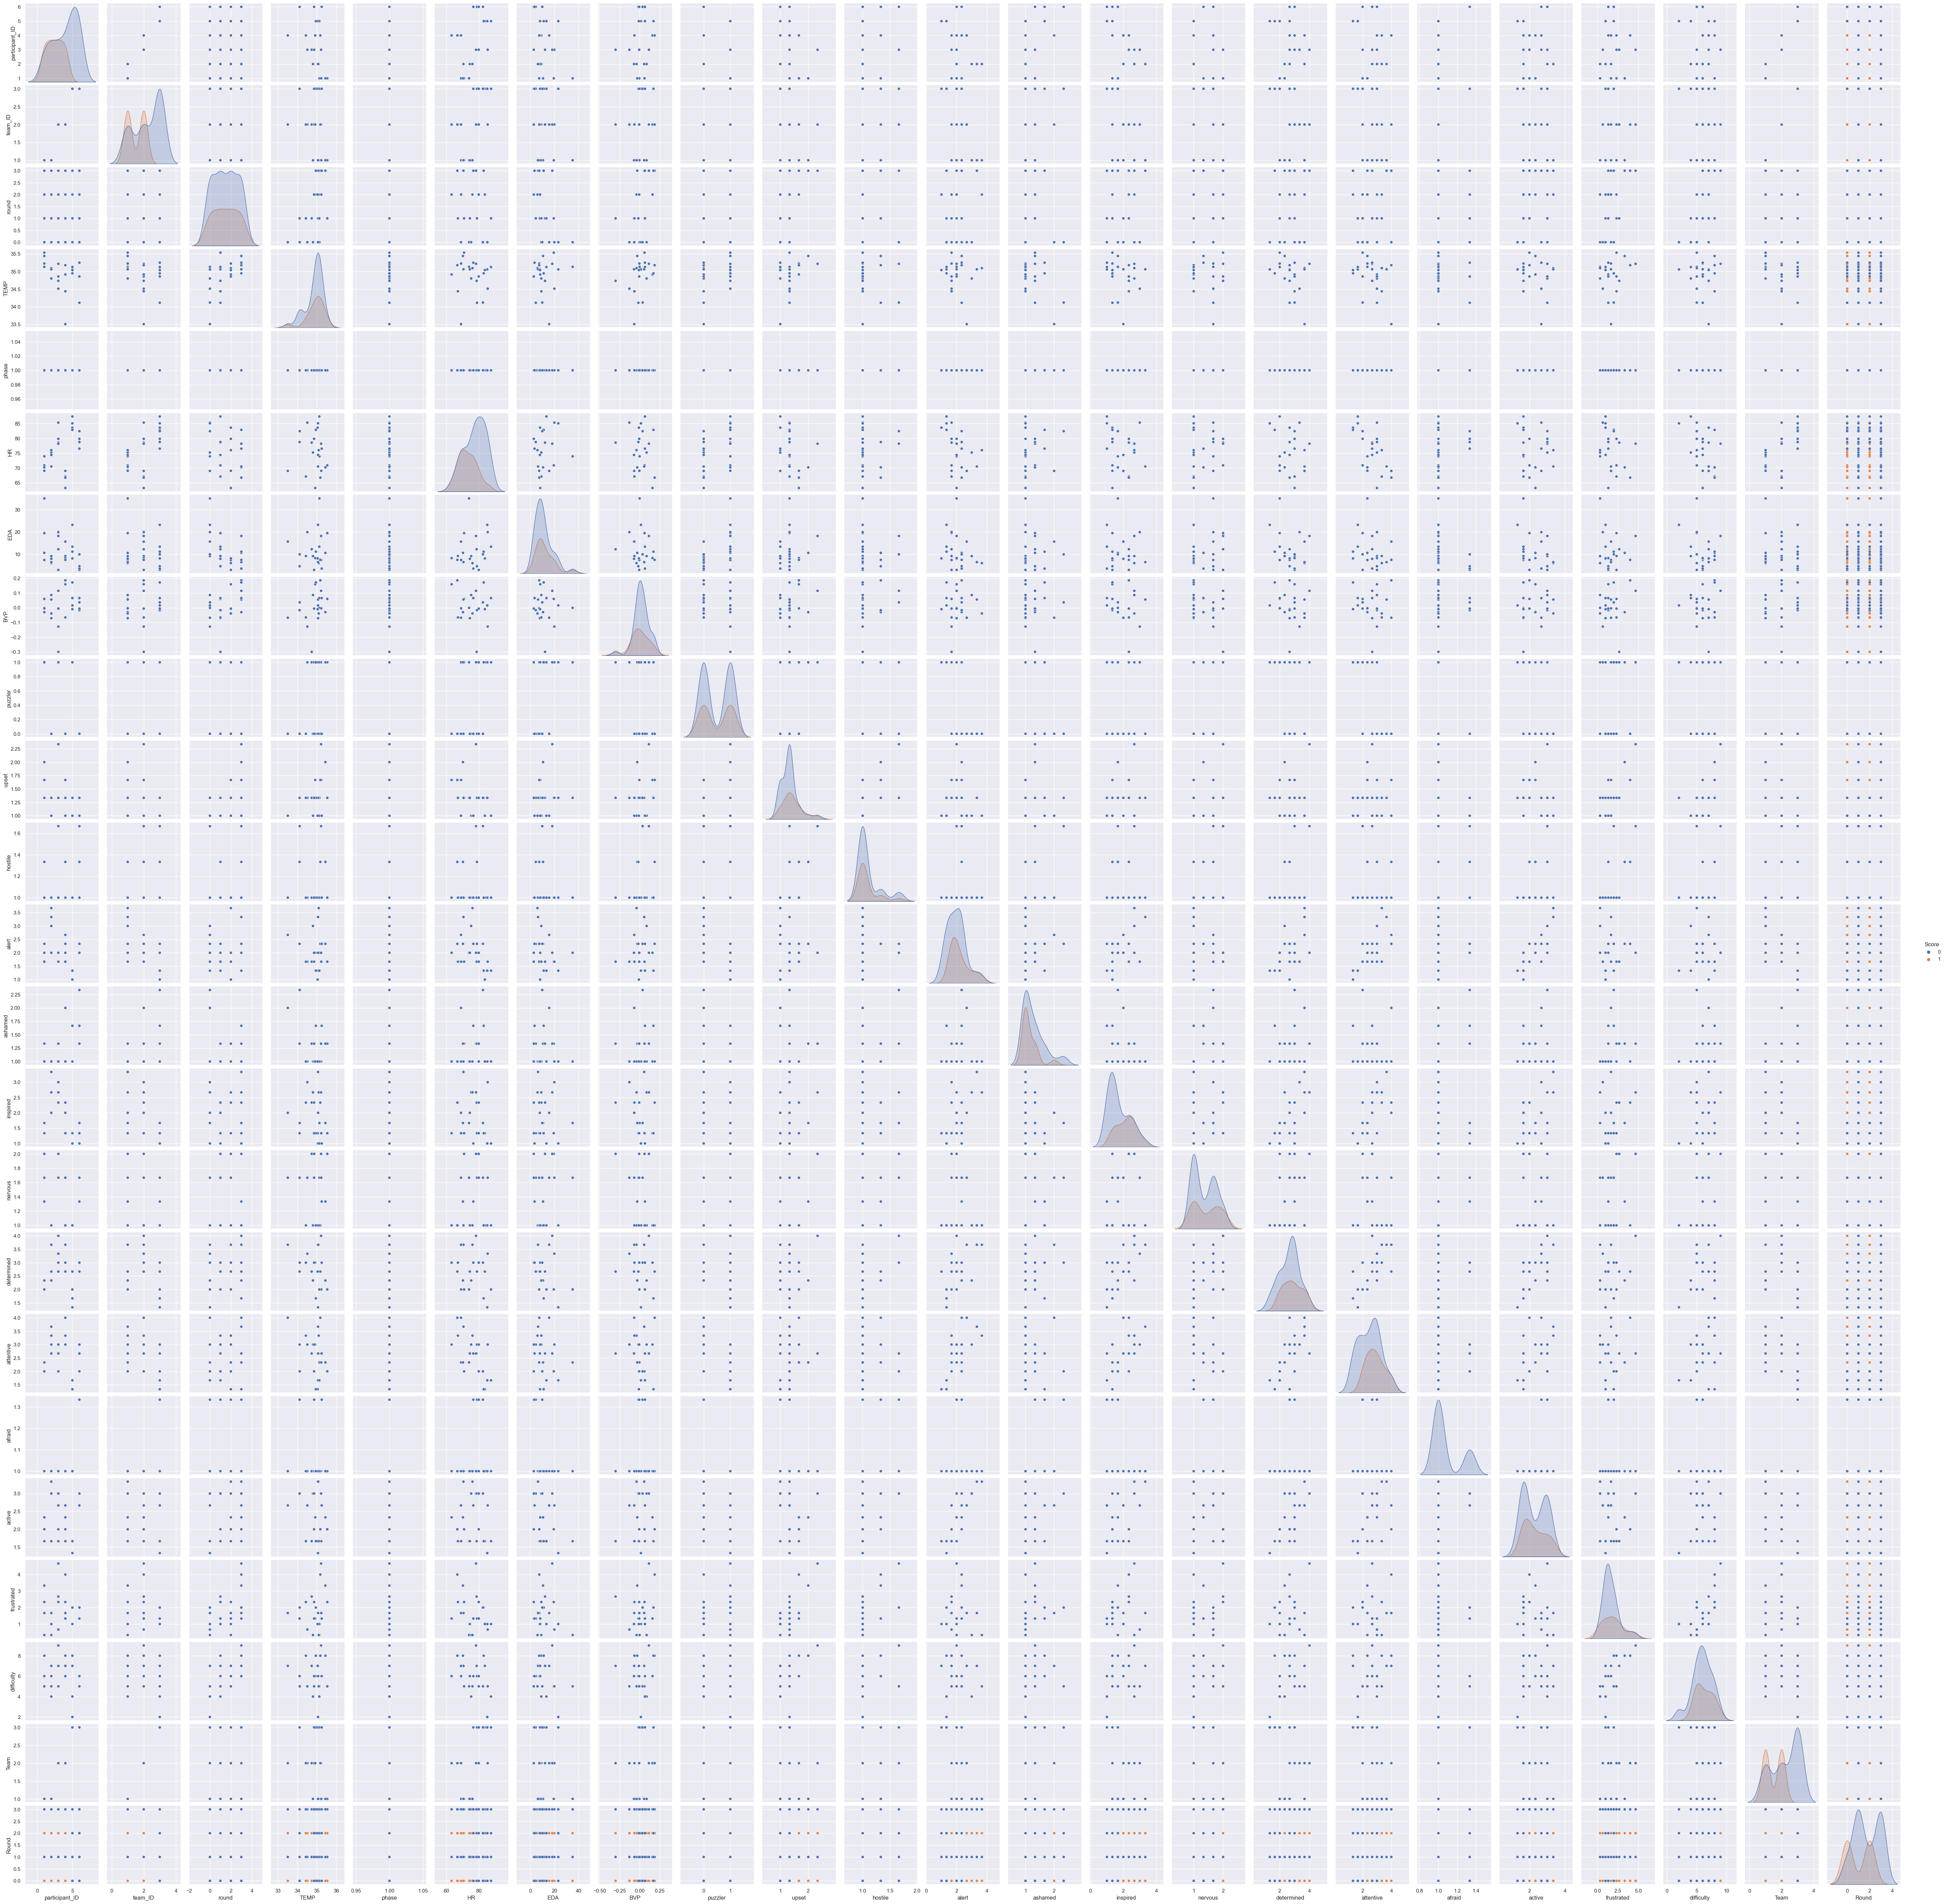

In [279]:
sns.pairplot(df_joined_agg_team_scores, hue='Score')

# Final thoughts
Another potential research question could be to investigate whether the monitoring device is broken?

I don't think there are that many valuable conclusions to draw from this except from the preliminary ones along the way. It does not seem like any of the biomarkers or emotions are correlated with the scores. There is not enough information available. 

# OLD STUFF - DON'T BOTHER

In [135]:
df_qs_grouped = df_qs.groupby(['participant_ID']).mean().reset_index()
df_qs_grouped = df_qs_grouped.drop(columns=['round', 'phase'])

/var/folders/ws/k1b01gtx6w3cxl_xhlxl_6vm0000gn/T/ipykernel_54482/2620309282.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hr_mean = df_hr.groupby(['participant_id', 'round', 'phase']).mean().reset_index()


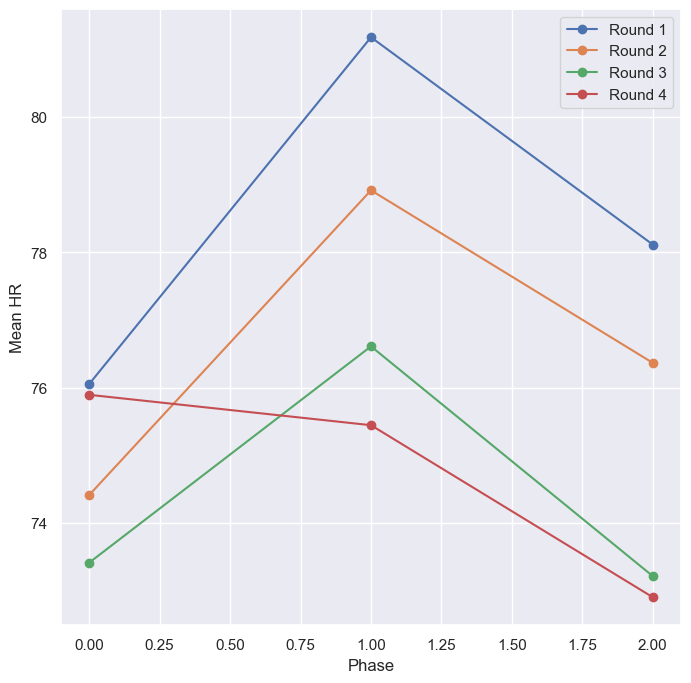

In [64]:
# Plot mean heart rate for each phase
df_hr_mean = df_hr.groupby(['participant_id', 'round', 'phase']).mean().reset_index()
df_hr_mean = df_hr_mean.groupby(['round', 'phase']).mean().reset_index()
df_hr_mean['phase'] = df_hr_mean['phase'].astype(int)
df_hr_mean['round'] = df_hr_mean['round'].astype(int)
df_hr_mean = df_hr_mean.sort_values(by=['round', 'phase'])

fig, ax = plt.subplots(1, figsize=(8, 8))
for i in range(num_rounds):
    df = df_hr_mean[df_hr_mean['round'] == i]
    ax.plot(df['phase'], df['HR'], 'o-', label=f'Round {i+1}')
ax.set_xlabel('Phase')
ax.set_ylabel('Mean HR')
ax.legend()

plt.show()

/var/folders/ws/k1b01gtx6w3cxl_xhlxl_6vm0000gn/T/ipykernel_54482/3179290209.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hr_mean = df_hr.groupby(['participant_id', 'round', 'phase']).mean().reset_index()


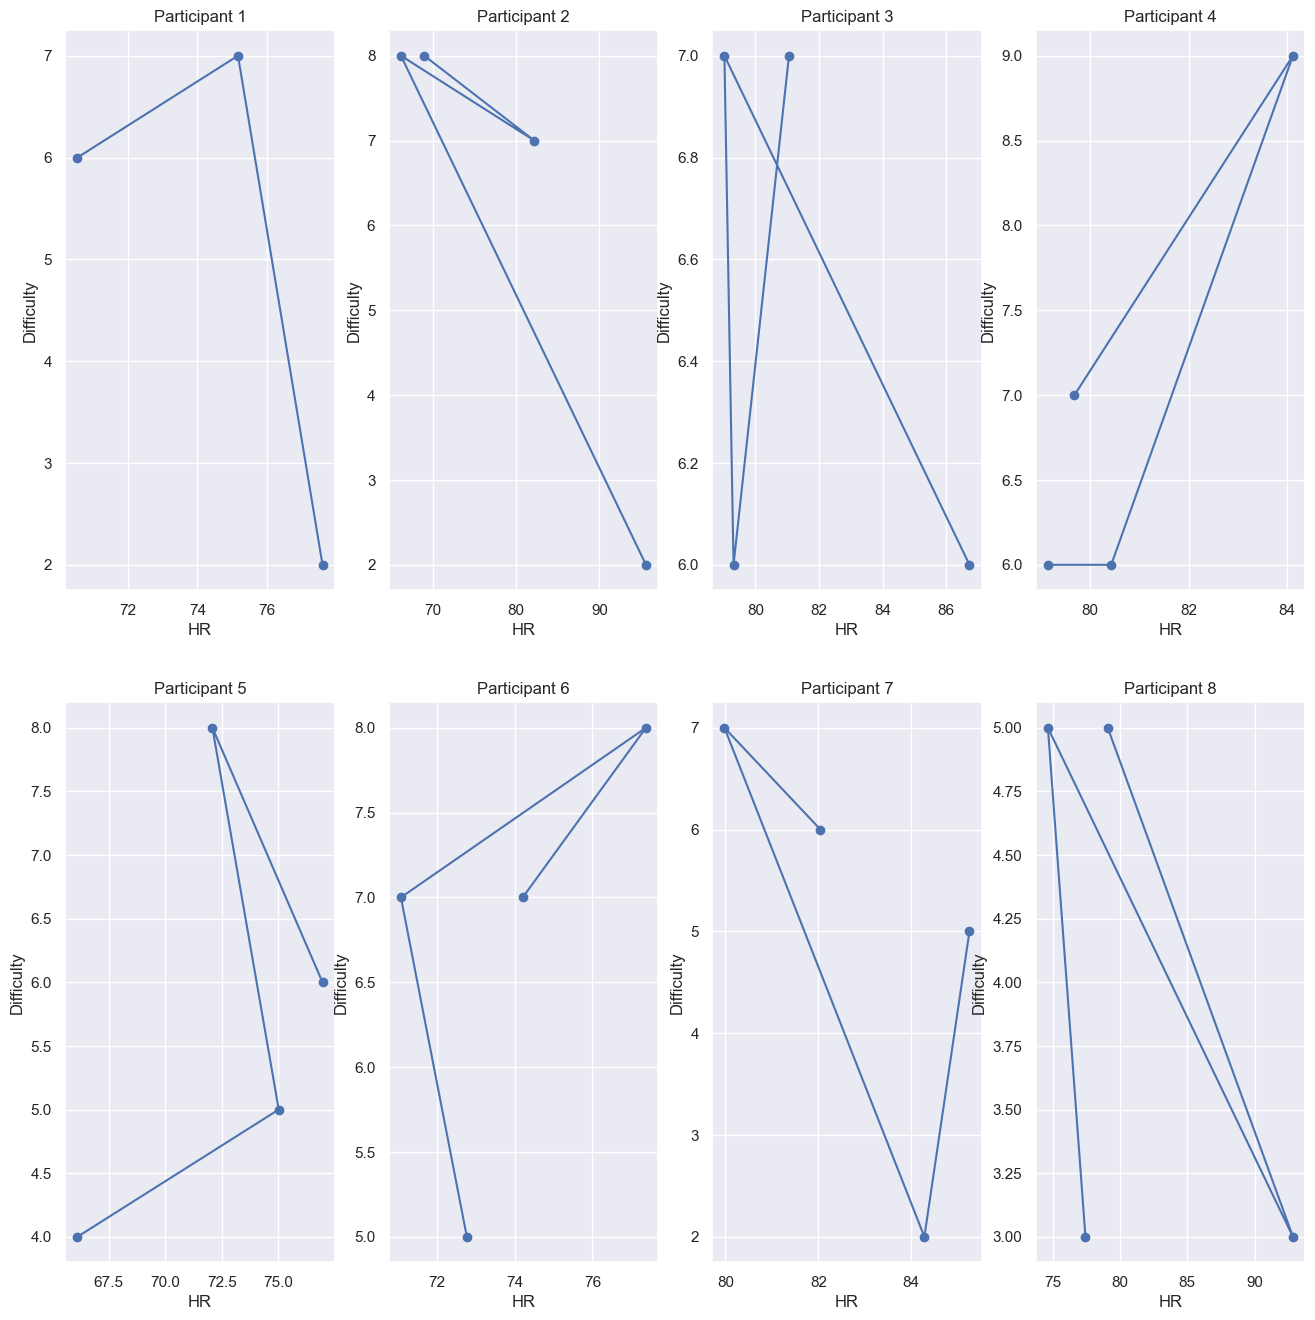

In [83]:
# Sort participants after highest mean HR in phase 1
df_hr_mean = df_hr.groupby(['participant_id', 'round', 'phase']).mean().reset_index()
df_hr_mean = df_hr_mean[df_hr_mean['phase'] == 1]
# df_qs where participant_id == 1 and phase == 1
df_qs_p1 = df_qs[df_qs['phase'] == 1]
df_qs_p1
df_hr_mean_qs_phase_1 = pd.merge(df_hr_mean, df_qs_p1, on=['participant_id', 'round', 'phase'])
df_hr_mean_qs_phase_1

# For each participant plot HR and difficuly
fig, ax = plt.subplots(2, 4, figsize=(16, 16))
for i in range(0, num_participants):
    pos_x = 0 if i < 4 else 1
    df = df_hr_mean_qs_phase_1[df_hr_mean_qs_phase_1['participant_id'] == i+1]
    ax[pos_x][i % 4].plot(df['HR'], df['difficulty'], 'o-')
    ax[pos_x][i % 4].set_xlabel('HR')
    ax[pos_x][i % 4].set_ylabel('Difficulty')
    ax[pos_x][i % 4].set_title(f'Participant {i+1}')
plt.show()

In [112]:
# Test if there is some correlation between HR and the emotional parameters

# mean hr for each participant
df_hr_mean_qs_phase_1_no_rounds = df_hr_mean_qs_phase_1.groupby(['participant_id', 'team_ID', 'puzzler']).mean()
df_hr_mean_qs_phase_1_no_rounds.drop(['round', 'phase'], inplace=True, axis=1)

# Correlation matrix for test
corr = df_hr_mean_qs_phase_1_no_rounds.corr()

# Correlations with HR
corr['HR'].sort_values(ascending=False)

/var/folders/ws/k1b01gtx6w3cxl_xhlxl_6vm0000gn/T/ipykernel_54482/4218258020.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hr_mean_qs_phase_1_no_rounds = df_hr_mean_qs_phase_1.groupby(['participant_id', 'team_ID', 'puzzler']).mean()


HR            1.000000
ashamed       0.555602
upset         0.375144
nervous       0.070717
alert         0.051739
active       -0.035592
inspired     -0.066568
difficulty   -0.110573
attentive    -0.155812
frustrated   -0.195907
determined   -0.279533
hostile      -0.447594
afraid             NaN
Name: HR, dtype: float64

There does not seem to be much correlation with mean HR in phase 1 to any of the emotions.

In [119]:
df_hr[df_hr['participant_id'] == 1].groupby(['round', 'phase'])